In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.phonon import bandstructure
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.ext.matproj import MPRester
with MPRester("6t2dQIcMaNaz6nTZlWm") as m:

    # Structure de bande de phonons du matériau attribué
    ph_bandstructure = m.get_phonon_bandstructure_by_material_id("mp-867339")

### Structure de bande de phonons et zone de Brillouin

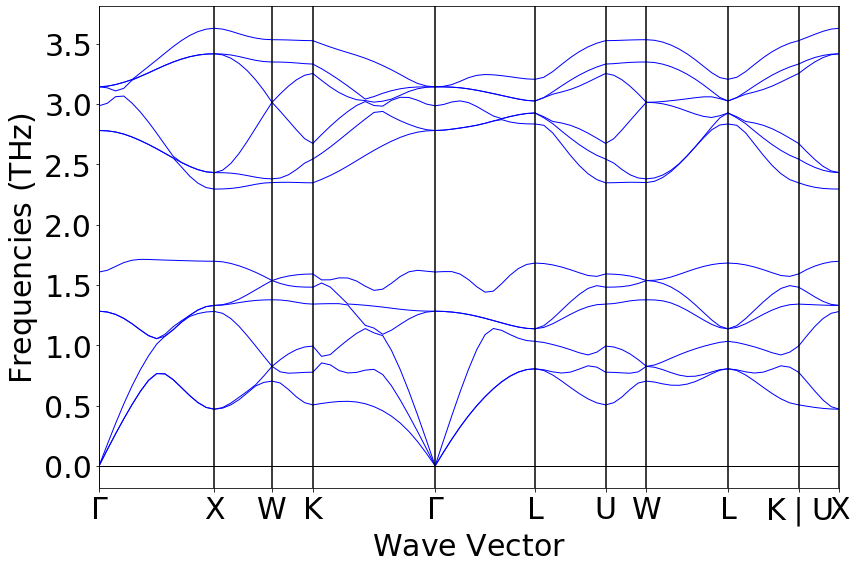

In [3]:
#structure de bande de phonons
plotter = PhononBSPlotter(ph_bandstructure)
plot = plotter.get_plot()
plt.show()

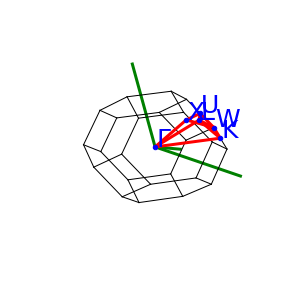

In [4]:
#zone de Brillouin
plotter.plot_brillouin() 
plt.show()

### Vitesse du son pour trois branches accoustiques différentes

In [5]:
data = plotter.bs_plot_data()
ticks = data.get("ticks")
distance = ticks.get("distance") #distance entre les directions
label = ticks.get("label")
frequencies = data.get("frequency") #[branch][qpoint][mode]
distances = data.get("distances")


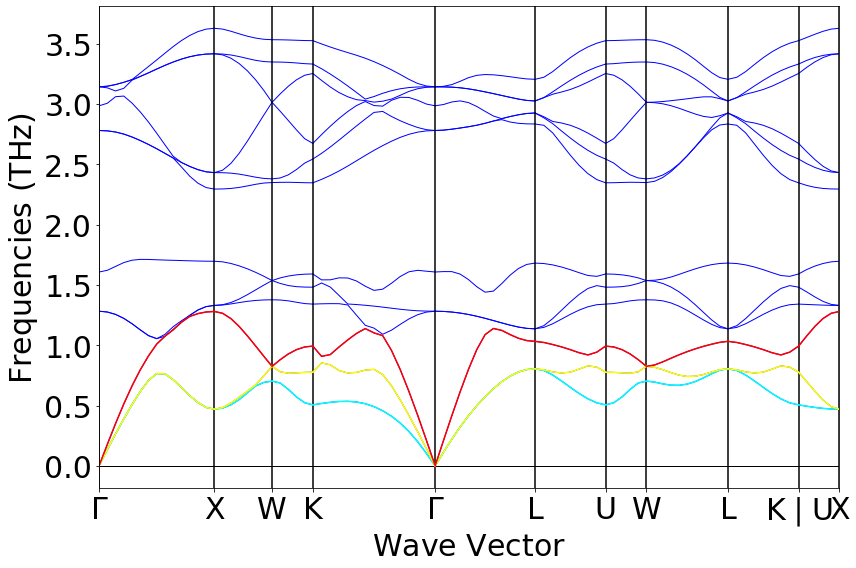

In [6]:
#plot des trois branches accoustiques qu'on va utiliser (0, 1 et 2)
plotter.get_plot()
#branches accoustiques 
for i in range(len(distances)):
    plt.plot(distances[i], frequencies[i][0], 'cyan')
    plt.plot(distances[i], frequencies[i][1], 'yellow')
    plt.plot(distances[i], frequencies[i][2], 'red')

Les 3 branches accoustiques que nous allons analyser sont représentées sur la figure ci-dessus en rouge, jaune et bleu clair.

Les 3 directions que nous allons utiliser sont: $\Gamma$ - $X$, $\Gamma$ - $K$ et $\Gamma$ - $L$

La vitesse du son est donnée par la pente de la relation de dispersion: $v_s = \frac{\partial \omega}{\partial k}$
avec $\omega = 2 \pi f$

### Première branche accoustique

Pour la première branche accoustique,
la vitesse du son le long de la direction Gamma - X vaut 1330.6649431665314 [m/s]
la vitesse du son le long de la direction Gamma - K vaut 1019.1961884734848 [m/s]
la vitesse du son le long de la direction Gamma - L vaut 1101.841877076676 [m/s]


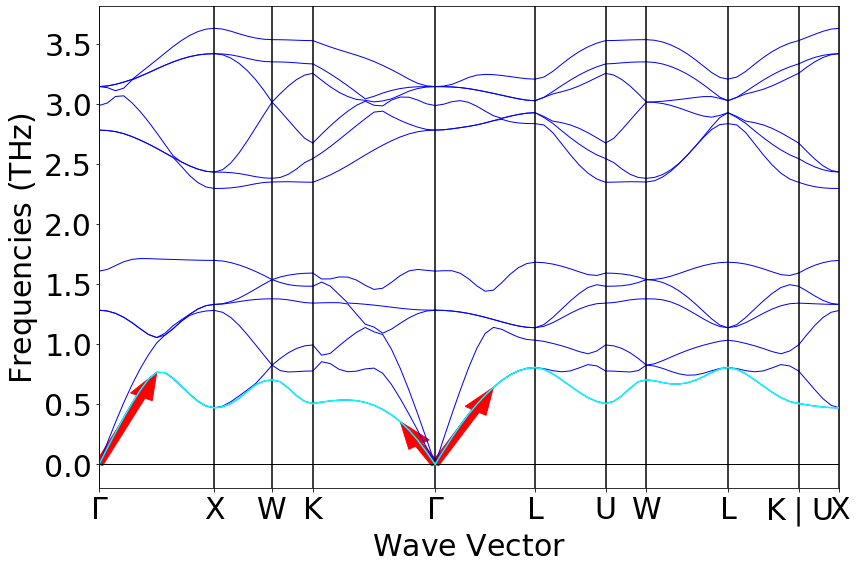

In [7]:
f0 = frequencies[0] #fréquences de la première direction
f1 = frequencies[3] #fréquences de la 2e direction
f2 = frequencies[4] #fréquences de la 3e direction

#première branche accoustique:
max0 = np.argmax(f0[0])
df0 = f0[0][max0] - f0[0][0]
max1 = 10
df1 = f1[0][max1] - f1[0][-1]
max2 = 7 
df2 = f2[0][max2] - f2[0][0]
dx1 = distances[0][max0]
dx2 = distances[3][-1] - distances[3][max1]
dx3 = distances[4][max2] - distances[4][0]
A = 10**(-10) #vecteur d'onde en angstrom-1 = 10^(10)[m]
f = 10**12 #fréquence en THz
v0 = 2*np.pi*(df0*f)/(dx1)*A
v1 = 2*np.pi*(df1*f)/(dx2)*A
v2 = 2*np.pi*(df2*f)/(dx3)*A
print("Pour la première branche accoustique,")
print("la vitesse du son le long de la direction Gamma - X vaut", v0, "[m/s]")
print("la vitesse du son le long de la direction Gamma - K vaut", v1, "[m/s]")
print("la vitesse du son le long de la direction Gamma - L vaut", v2, "[m/s]")

plotter.get_plot()
for i in range(len(distances)):
    plt.plot(distances[i], frequencies[i][0], 'cyan')
plt.arrow(distance[0], f0[0][0], dx1, df0, color ='red',width = 0.05,length_includes_head =True)
plt.arrow(distance[7], f1[0][-1], -dx2, df1, color ='red',width = 0.05,length_includes_head =True)
plt.arrow(distance[8], f2[0][0], dx3, df2, color ='red',width = 0.05,length_includes_head =True)
plt.show()

### Deuxième branche accoustique

Pour la deuxième branche accoustique,
la vitesse du son le long de la direction Gamma - X vaut 1330.6649431665394 [m/s]
la vitesse du son le long de la direction Gamma - K vaut 1448.3932426499953 [m/s]
la vitesse du son le long de la direction Gamma - L vaut 1101.8418770766777 [m/s]


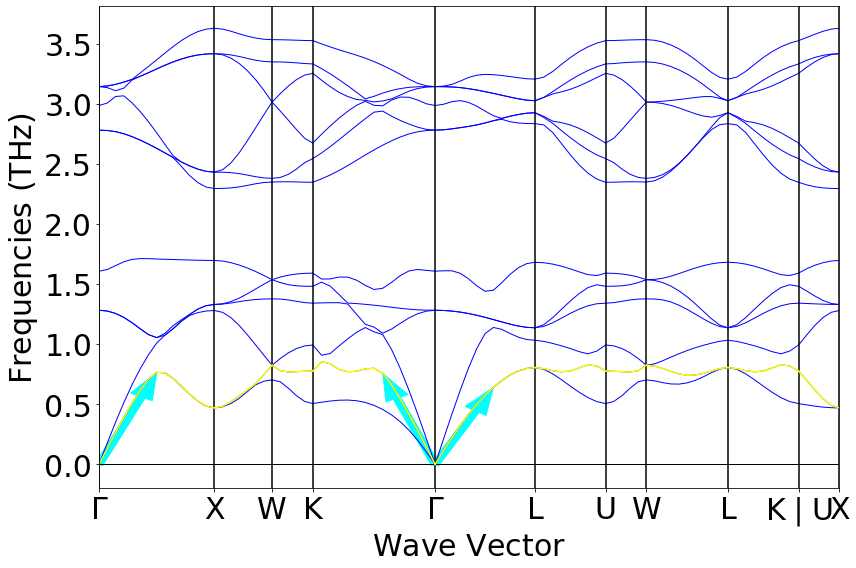

In [8]:
#2e branche accoustique:
max0 = np.argmax(f0[1])
df0 = f0[1][max0] - f0[1][0]
max1 = 8
df1 = f1[1][max1] - f1[1][-1]
max2 = 7
df2 = f2[1][max2] - f2[1][0]
dx1 = distances[0][max0]
dx2 = distances[3][-1] - distances[3][max1]
dx3 = distances[4][max2] - distances[4][0]
v0 = 2*np.pi*(df0*f)/(dx1)*A
v1 = 2*np.pi*(df1*f)/(dx2)*A
v2 = 2*np.pi*(df2*f)/(dx3)*A
print("Pour la deuxième branche accoustique,")
print("la vitesse du son le long de la direction Gamma - X vaut", v0, "[m/s]")
print("la vitesse du son le long de la direction Gamma - K vaut", v1, "[m/s]")
print("la vitesse du son le long de la direction Gamma - L vaut", v2, "[m/s]")

plotter.get_plot()
for i in range(len(distances)):
    plt.plot(distances[i], frequencies[i][1], 'yellow')
plt.arrow(distance[0], f0[1][0], dx1, df0, color ='cyan',width = 0.05,length_includes_head =True)
plt.arrow(distance[7], f1[1][-1], -dx2, df1, color ='cyan',width = 0.05,length_includes_head =True)
plt.arrow(distance[8], f2[1][0], dx3, df2, color ='cyan',width = 0.05,length_includes_head =True)
plt.show()

### Troisième branche accoustique

Pour la troisième branche accoustique,
la vitesse du son le long de la direction Gamma - X vaut 1756.8581012650495 [m/s]
la vitesse du son le long de la direction Gamma - K vaut 2065.7550262478385 [m/s]
la vitesse du son le long de la direction Gamma - L vaut 2185.3591308726645 [m/s]


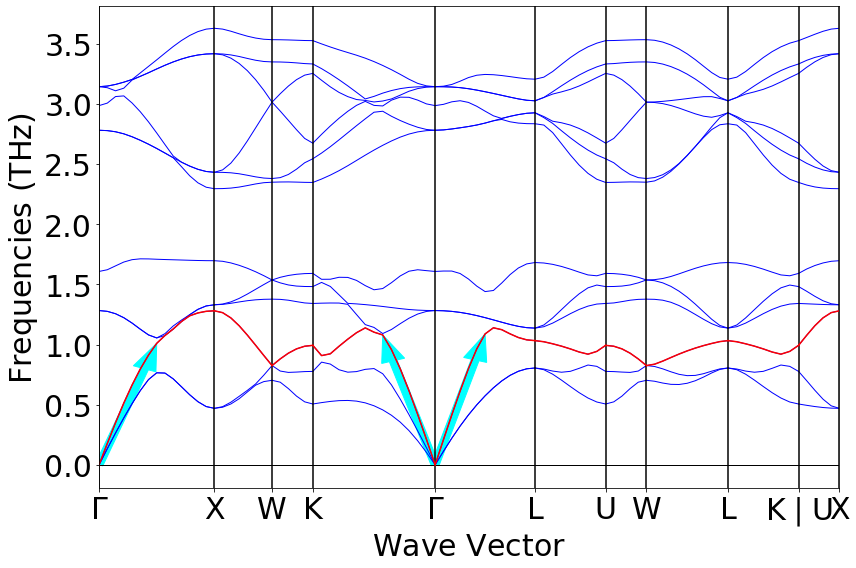

In [9]:
#3e branche accoustique:
max0 = 7
df0 = f0[2][max0] - f0[2][0]
max1 = 8
df1 = f1[2][max1] - f1[2][-1]
max2 = 6 
df2 = f2[2][max2] - f2[2][0]
dx1 = distances[0][max0]
dx2 = distances[3][-1] - distances[3][max1]
dx3 = distances[4][max2] - distances[4][0]
v0 = 2*np.pi*(df0*f)/(dx1)*A
v1 = 2*np.pi*(df1*f)/(dx2)*A
v2 = 2*np.pi*(df2*f)/(dx3)*A
print("Pour la troisième branche accoustique,")
print("la vitesse du son le long de la direction Gamma - X vaut", v0, "[m/s]")
print("la vitesse du son le long de la direction Gamma - K vaut", v1, "[m/s]")
print("la vitesse du son le long de la direction Gamma - L vaut", v2, "[m/s]")

plotter.get_plot()
for i in range(len(distances)):
    plt.plot(distances[i], frequencies[i][2], 'red')
plt.arrow(distance[0], f0[2][0], dx1, df0, color ='cyan',width = 0.05,length_includes_head =True)
plt.arrow(distance[7], f1[2][-1], -dx2, df1, color ='cyan',width = 0.05,length_includes_head =True)
plt.arrow(distance[8], f2[2][0], dx3, df2, color ='cyan',width = 0.05,length_includes_head =True)
plt.show()